## Machine Learning: Midterm Exam

*Submitted by:*  
**Christian Elijah Darvin**  
BCS32  
College of Information and Computer Studies - De La Salle University Dasmariñas


In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 50)

### Explanatory Data Analysis

In [500]:
df = pd.read_csv("./data/student-mat.csv", delimiter=";")
df.columns, df.shape

(Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
        'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
        'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
        'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
        'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
       dtype='object'),
 (395, 33))

In [501]:
df = df[["studytime", "absences", "G1", "G2", "famsup", "G3"]]
df["Previous Grades"] = (df["G1"] + df["G2"]) / 2
df = df.drop(["G1", "G2"], axis=1)

df.columns = [
    "StudyTime",
    "Absences",
    "FamilySupport",
    "Final_Grade",
    "Previous_Grades",
]
df["Attendance"] = (((93 - df["Absences"]) / 93) * 100).astype(int)
df = df.drop(["Absences"], axis=1)

df["FamilySupport"] = df["FamilySupport"].apply(
    lambda x: 1 if x == "yes" else 0 if x == "no" else x
)

In [502]:
df

,StudyTime,FamilySupport,Final_Grade,Previous_Grades,Attendance
0,2,0,6,5.5,93
1,2,1,6,5.0,95
2,2,0,10,7.5,89
3,3,1,15,14.5,97
4,2,1,10,8.0,95
...,...,...,...,...,...
390,2,1,9,9.0,88
391,1,0,16,15.0,96
392,1,0,7,9.0,96
393,1,0,10,11.5,100


In [503]:
df.head()

,StudyTime,FamilySupport,Final_Grade,Previous_Grades,Attendance
0,2,0,6,5.5,93
1,2,1,6,5.0,95
2,2,0,10,7.5,89
3,3,1,15,14.5,97
4,2,1,10,8.0,95


In [504]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudyTime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
FamilySupport,395.0,0.612658,0.487761,0.0,0.0,1.0,1.0,1.0
Final_Grade,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0
Previous_Grades,395.0,10.811392,3.407479,2.0,8.5,11.0,13.0,19.0
Attendance,395.0,93.422785,8.688401,19.0,91.0,95.0,100.0,100.0


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudyTime        395 non-null    int64  
 1   FamilySupport    395 non-null    int64  
 2   Final_Grade      395 non-null    int64  
 3   Previous_Grades  395 non-null    float64
 4   Attendance       395 non-null    int32  
dtypes: float64(1), int32(1), int64(3)
memory usage: 14.0 KB


In [506]:
df.isna().sum()

StudyTime          0
FamilySupport      0
Final_Grade        0
Previous_Grades    0
Attendance         0
dtype: int64

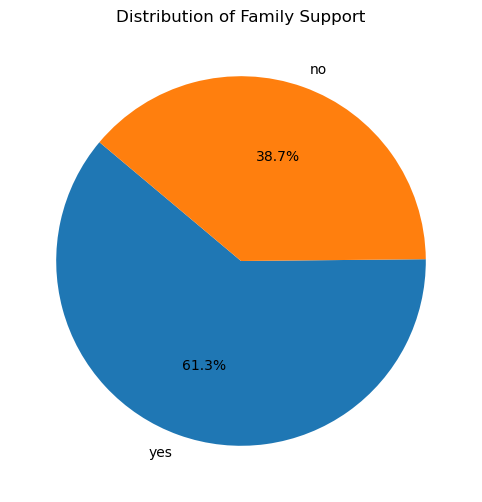

In [507]:
famsup_counts = df["FamilySupport"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(famsup_counts, labels=["yes", "no"], autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Family Support")
plt.show()

In [508]:
df["Final_Grade"].unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4], dtype=int64)

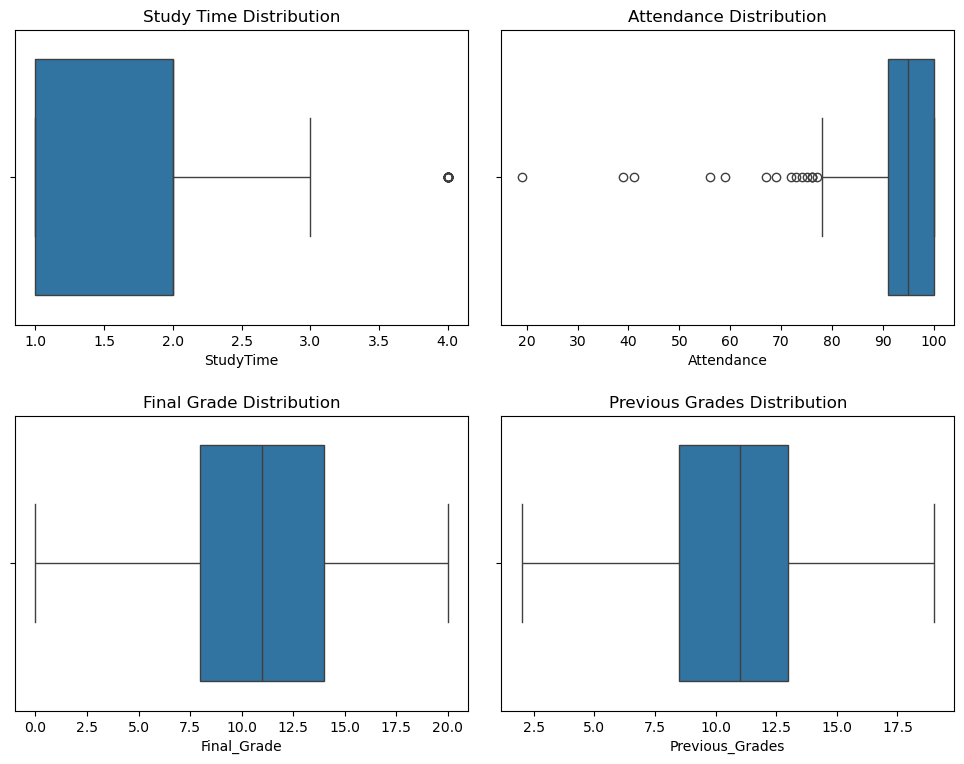

In [509]:
def create_boxplot(data, x, title, ax):
    sns.boxplot(data=data, x=x, ax=ax, legend=False)
    ax.set_title(title)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

create_boxplot(df, "StudyTime", "Study Time Distribution", axes[0, 0])
create_boxplot(df, "Attendance", "Attendance Distribution", axes[0, 1])
create_boxplot(df, "Final_Grade", "Final Grade Distribution", axes[1, 0])
create_boxplot(df, "Previous_Grades", "Previous Grades Distribution", axes[1, 1])

plt.tight_layout(pad=2)
plt.show()

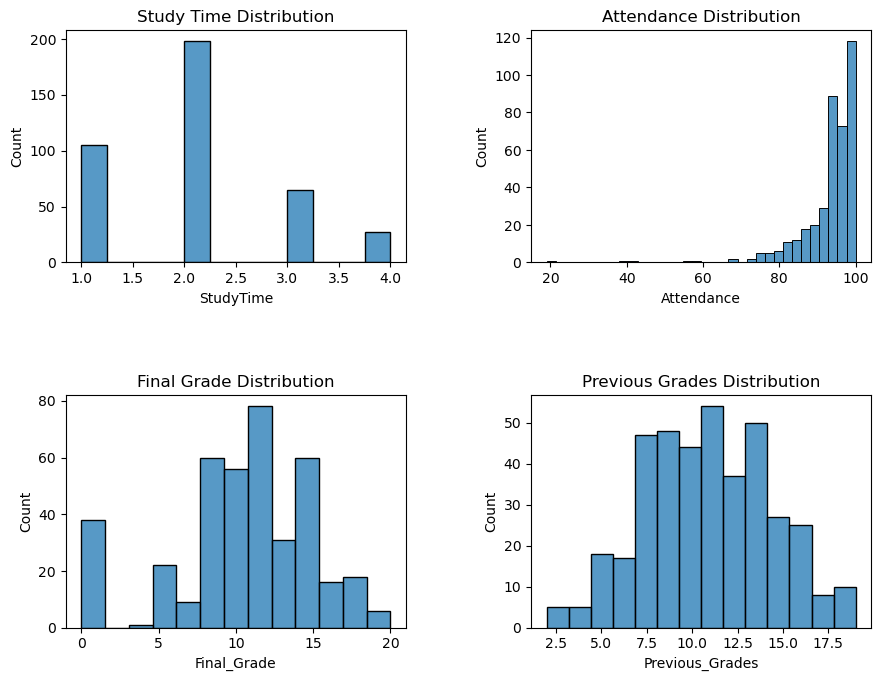

In [510]:
def create_histplot(data, x, title, ax):
    sns.histplot(data=data, x=x, ax=ax)
    ax.set_title(title)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

create_histplot(df, "StudyTime", "Study Time Distribution", axes[0, 0])
create_histplot(df, "Attendance", "Attendance Distribution", axes[0, 1])
create_histplot(df, "Final_Grade", "Final Grade Distribution", axes[1, 0])
create_histplot(df, "Previous_Grades", "Previous Grades Distribution", axes[1, 1])

plt.tight_layout(pad=5)
plt.show()

In [511]:
X = df.drop("Final_Grade", axis=1)
y = df["Final_Grade"]

display(X.head())
display(y.head())

,StudyTime,FamilySupport,Previous_Grades,Attendance
0,2,0,5.5,93
1,2,1,5.0,95
2,2,0,7.5,89
3,3,1,14.5,97
4,2,1,8.0,95


0     6
1     6
2    10
3    15
4    10
Name: Final_Grade, dtype: int64

In [512]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df.drop("Final_Grade", axis=1).values
y = df["Final_Grade"].values


def create_train_test_split(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

### K-Nearest Neighbors

In [513]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FactorAnalysis

# Generate 18 distinct colors
colors = [
    "red",
    "green",
    "blue",
    "purple",
    "orange",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "yellow",
    "magenta",
    "navy",
    "lime",
    "teal",
    "coral",
    "gold",
    "indigo",
]

# Create a colormap from these colors
cmap_light = ListedColormap(colors[:18])


def plot_decision_boundary(X, y, knn, title):
    # Apply Factor Analysis to reduce the dataset to 2D
    pca = FactorAnalysis(n_components=2)
    X_set_pca = pca.fit_transform(X)

    # Fit the KNN classifier on the transformed data
    knn.fit(X_set_pca, y)

    # Define the grid boundaries for the plot
    x1_min, x1_max = X_set_pca[:, 0].min() - 1, X_set_pca[:, 0].max() + 1
    x2_min, x2_max = X_set_pca[:, 1].min() - 1, X_set_pca[:, 1].max() + 1
    XX, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

    # Predict values for the mesh grid
    Z = knn.predict(np.c_[XX.ravel(), yy.ravel()])
    Z = Z.reshape(XX.shape)

    # Plot the decision boundary with the new colormap
    plt.contourf(XX, yy, Z, alpha=0.5, cmap=cmap_light)
    plt.xlim(XX.min(), XX.max())
    plt.ylim(yy.min(), yy.max())

    # Plot the actual data points with unique colors per class
    unique_classes = np.unique(y)
    for i, j in enumerate(unique_classes):
        plt.scatter(
            X_set_pca[y == j, 0], X_set_pca[y == j, 1], color=colors[i], label=j
        )

    # Add titles and labels
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.show()

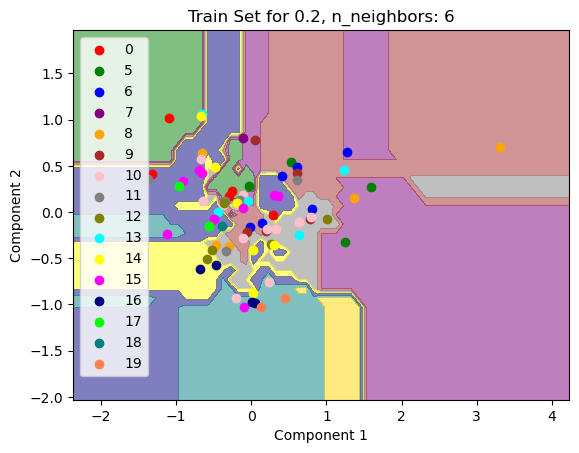

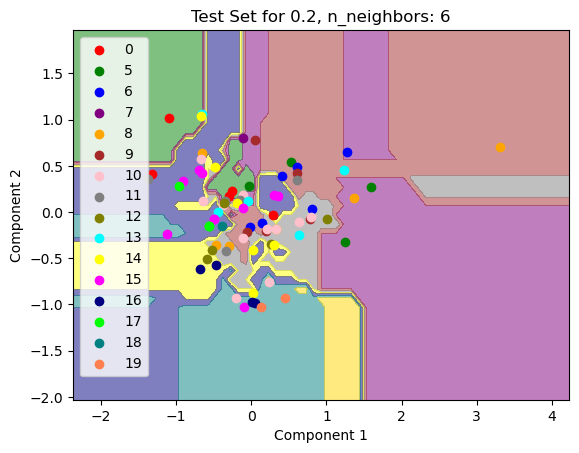

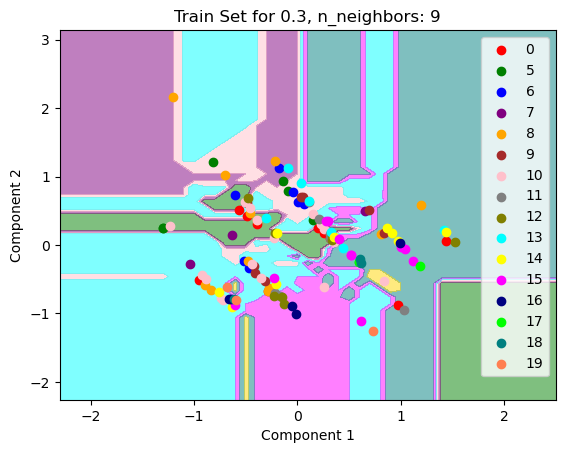

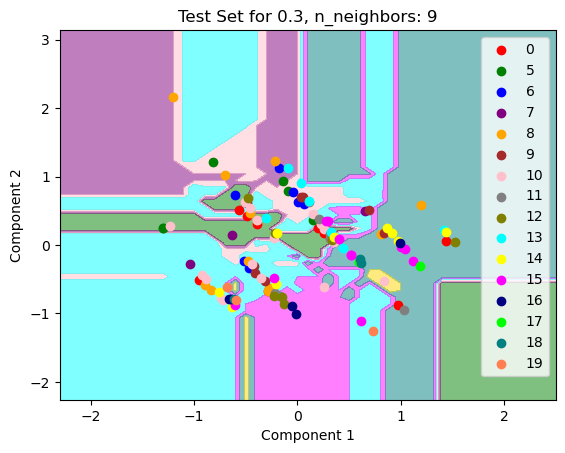

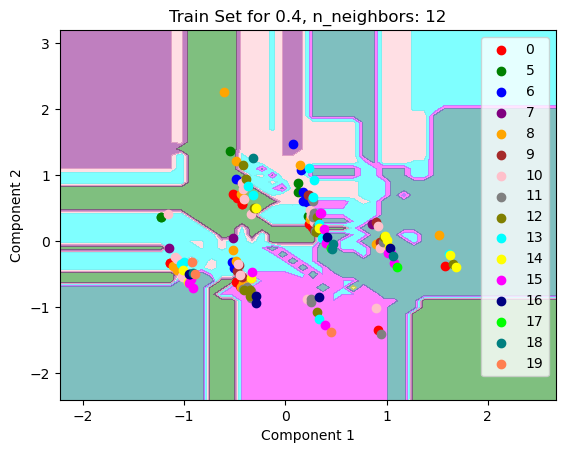

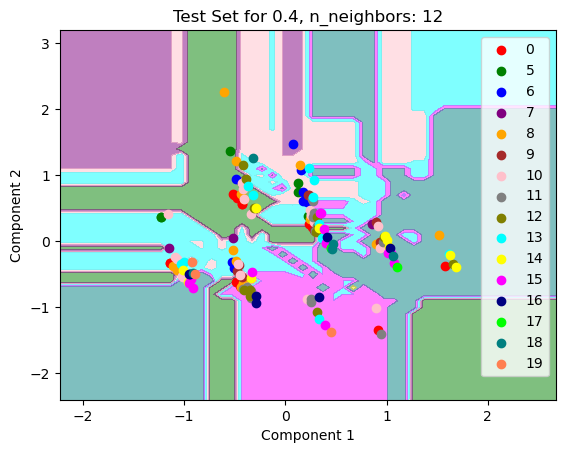

Accuracy Scores: [0.241, 0.294, 0.297]
Precision Scores: [0.194, 0.206, 0.271]
Recall Scores: [0.241, 0.294, 0.297]
F1 Scores: [0.207, 0.234, 0.266]


In [514]:
test_sizes = [0.2, 0.3, 0.4]
n_neighbors = [6, 9, 12]


accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []


for i, test_size in enumerate(test_sizes):
    X_train, X_test, y_train, y_test = create_train_test_split(X, y, test_size)

    n_neighbor = n_neighbors[i]

    knn = KNeighborsClassifier(metric="minkowski", p=1, n_neighbors=n_neighbor)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy_clf = accuracy_score(y_pred=y_pred, y_true=y_test)
    precision_clf = precision_score(
        y_pred=y_pred, y_true=y_test, average="weighted", zero_division=0
    )
    recall_clf = recall_score(
        y_pred=y_pred, y_true=y_test, average="weighted", zero_division=0
    )
    f1_clf = f1_score(y_pred=y_pred, y_true=y_test, average="weighted", zero_division=0)
    cm = confusion_matrix(y_pred=y_pred, y_true=y_test)

    confusion_matrices.append(cm)
    accuracy_scores.append(round(accuracy_clf, 3))
    precision_scores.append(round(precision_clf, 3))
    recall_scores.append(round(recall_clf, 3))
    f1_scores.append(round(f1_clf, 3))

    plot_decision_boundary(
        X_test,
        y_test,
        knn,
        f"Train Set for {test_size}, n_neighbors: {n_neighbor}",
    )
    plot_decision_boundary(
        X_test,
        y_test,
        knn,
        f"Test Set for {test_size}, n_neighbors: {n_neighbor}",
    )


print(f"Accuracy Scores: {accuracy_scores}")
print(f"Precision Scores: {precision_scores}")
print(f"Recall Scores: {recall_scores}")
print(f"F1 Scores: {f1_scores}")

### Metric Evaluation

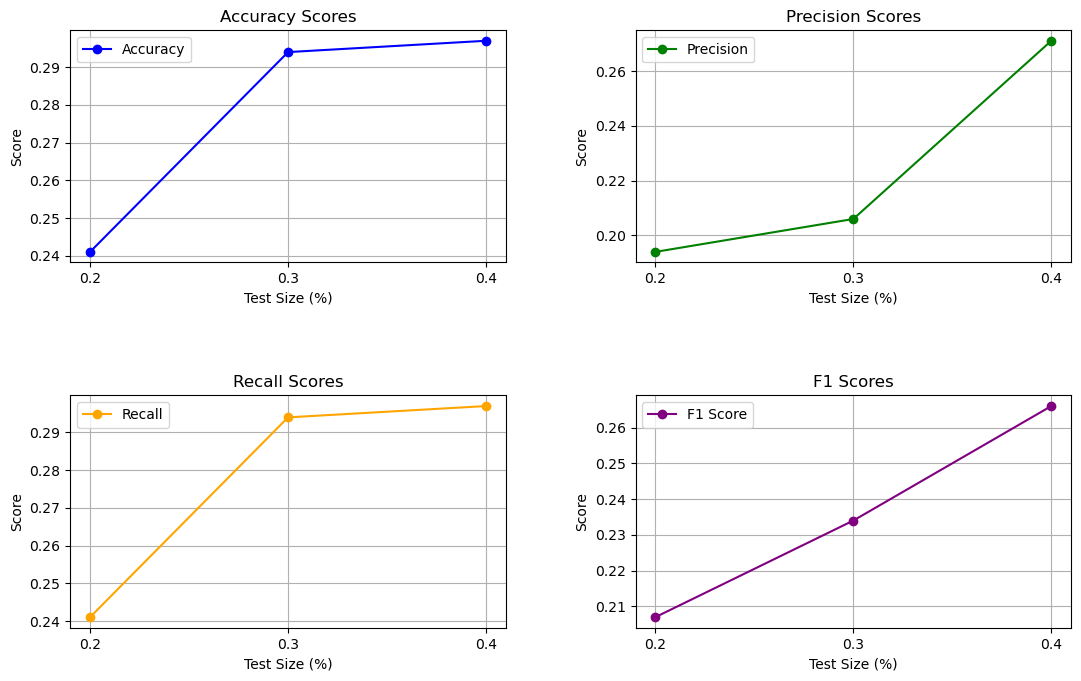

In [515]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].plot(test_sizes, accuracy_scores, label="Accuracy", marker="o", c="blue")
axes[0, 0].set_title("Accuracy Scores")

axes[0, 1].plot(test_sizes, precision_scores, label="Precision", marker="o", c="green")
axes[0, 1].set_title("Precision Scores")

axes[1, 0].plot(test_sizes, recall_scores, label="Recall", marker="o", c="orange")
axes[1, 0].set_title("Recall Scores")

axes[1, 1].plot(test_sizes, f1_scores, label="F1 Score", marker="o", c="purple")
axes[1, 1].set_title("F1 Scores")

for ax in axes.flat:
    ax.set(xlabel="Test Size (%)", ylabel="Score")
    ax.legend(loc="best")
    ax.grid(True)
    ax.set_xticks(test_sizes)


plt.tight_layout(pad=5)
plt.show()

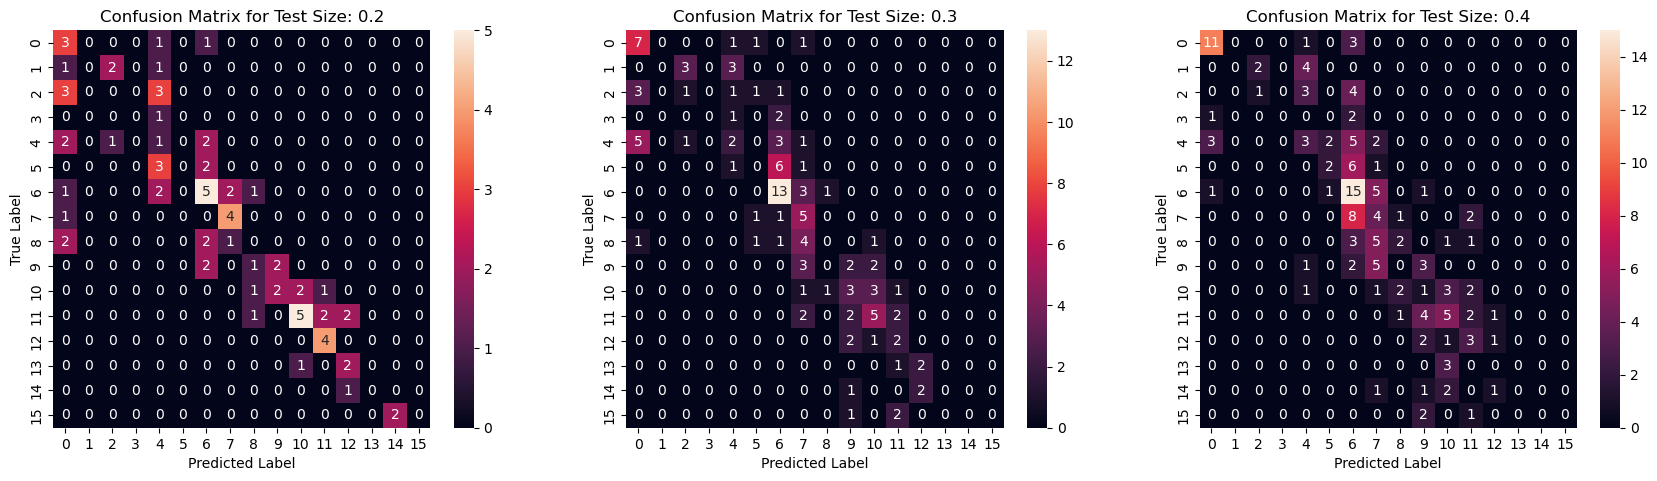

In [516]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


for ax, confusion_matrix, test_size in zip(
    axes.flatten(), confusion_matrices, test_sizes
):
    sns.heatmap(confusion_matrix, annot=True, cmap="rocket", ax=ax)
    ax.set_title(f"Confusion Matrix for Test Size: {test_size}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout(pad=5)
plt.show()

### Linear Regression

In [517]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

test_sizes = [0.2, 0.3, 0.4]
mse_scores = []
r2_scores = []
lr_coefs = []
lr_intercepts = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    lr_coefs.append(lr_model.coef_)
    lr_intercepts.append(lr_model.intercept_)

    y_pred = lr_model.predict(X_test)
    mse_lr = mean_squared_error(y_true=y_test, y_pred=y_pred)
    r2_score_lr = r2_score(y_true=y_test, y_pred=y_pred)

    mse_scores.append(round(mse_lr, 3))
    r2_scores.append(round(r2_score_lr, 3))

print(f"MSE: {mse_scores}")
print(f"R2 Scores: {r2_scores}")
# print(f"LR Coefs: {lr_coefs}")
# print(f"LR Intercepts: {lr_intercepts}")

MSE: [2.689, 5.249, 2.841]
R2 Scores: [0.842, 0.735, 0.835]
